# Traffic model research

In [1]:
from src.traffic_model import traffic_model as model
from joblib import Parallel, delayed
import numpy as np
import re
import joblib
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import ticker

In [2]:
import matplotlib.animation as animation

In [3]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

## Test human drive vehicle

### Single line

__Test__

In [4]:
road_param = {
    "N_cells": 1000,
    "N_lane": 1,
}
cars = {model.HumanDriveVehicle: 200}

In [5]:
model_1 = model.Model(road_parametrs=road_param, vehicles=cars)

In [6]:
%%time
model_1.model_stabilization(5000)

CPU times: total: 48.1 s
Wall time: 48.6 s


In [7]:
model_1.model_research(500)

In [8]:
model_1.result

{'rho': [0.2],
 'flow': [0.28339],
 'change_frequency': 0,
 'station_time': None,
 'velosity_av_typed': {"<class 'src.traffic_model.traffic_model.Bus'>": 0.0,
  "<class 'src.traffic_model.traffic_model.HumanDriveVehicle'>": array([1.41695])}}

__Fundamential diagramm__

In [9]:
core = joblib.cpu_count() - 2
cars_arr = np.arange(1000, step=50)[1:]
cars_arr

array([ 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550, 600, 650,
       700, 750, 800, 850, 900, 950])

In [ ]:
def step(cars):
    road_param = {
        "N_cells": 1000,
        "N_lane": 1,
    }
    cars = {model.HumanDriveVehicle: cars}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(100)
    return road.result

In [ ]:
%%time
tabel_result = Parallel(n_jobs=core, verbose=10)(delayed(step)(cars) for cars in cars_arr)

In [ ]:
result = pd.DataFrame(tabel_result)
result

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

label = "$p_{slow} = $"+str(0.5)
plt.plot(result['rho'], result['flow'], label=label)

plt.ylim(0,0.6)
plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flow [Vechicle/time step]',  fontsize = fs)
plt.title(r'NaSch model with different probability to slow', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

__Visualization__

In [ ]:
road_param = {
    "N_cells": 100,
    "N_lane": 1,
}
cars = {model.HumanDriveVehicle: 30}

In [ ]:
model_vis = model.Model(road_parametrs=road_param, vehicles=cars)

In [ ]:
%%time
model_vis.model_stabilization(2000)

In [ ]:
model_vis.model_research(100, is_diagramm=True)

In [ ]:
layers = model_vis.x_t_diagramm[0]

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16


fig = plt.figure(figsize=(10,6), dpi=300)

time = np.linspace(0, layers.shape[0]-1, layers.shape[0], dtype=int)
cells = np.linspace(0, layers.shape[1]-1, layers.shape[1], dtype=int)
grid = np.meshgrid(cells, time, indexing='xy')

#plt.scatter(grid[0], grid[1], marker='s', c='grey', s=1, alpha=0.2)
#bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = road_map, cmap = 'RdYlGn', s = 4, alpha = 1, edgecolors='black', linewidths=0.5 )
#bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = layers, cmap = 'RdYlGn', s = 0.1, alpha = 1 )
bar_pic = plt.pcolor(layers.astype(float), cmap="RdYlGn", vmin=0, vmax=3)
plt.xlim(0, layers.shape[1])
plt.ylim(0, layers.shape[0])
plt.gca().invert_yaxis()
plt.colorbar()
plt.clim(0, 3)
plt.title(f"x-t diagramm with density {model_vis.result['rho']}")
plt.xlabel(r'$\mathrm{cells}$',  fontsize = fs)
plt.ylabel(r'$\mathrm{time}$',  fontsize = fs)
#plt.grid(linewidth=0.5)
plt.show()
#fig.savefig(f'data/x_t_{density}.jpg', dpi = 200, pad_inches=0.1, format='jpg', bbox_inches='tight')

In [ ]:
#fig.savefig(f'data/x_t_{model_vis.result["rho"]}.jpg', dpi = 200, pad_inches=0.1, format='jpg', bbox_inches='tight')

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
fig, ax = plt.subplots(figsize=(20,1))

cells = layers[0].astype(float).reshape((1,layers.shape[1]))
left, right = 0, 40

ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)
ax.set_xticks(np.arange(right-left+1))
ax.set_yticks([0,1])
ax.grid(color='black', linewidth=2)
ax.set_title(f"step: {2}")
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
left, right = 0, 50

fig, ax = plt.subplots(figsize=(20,2))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False)

def animate(i):
    ax.clear()
    cells = layers[i].astype(float).reshape((1,layers.shape[1]))
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(np.arange(right-left+1))
    ax.set_yticks([0,1])
    ax.grid(color='black', linewidth=2)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, layers.shape[0]),
                                      interval = 500,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_slow.gif',
                 writer='ffmpeg',  
                  dpi=300)

### Twoline

__Test__

In [ ]:
road_param = {
    "N_cells": 1000,
    "N_lane": 2,
}
cars = {model.HumanDriveVehicle: 600}

In [ ]:
model_3 = model.Model(road_parametrs=road_param, vehicles=cars)

In [ ]:
%%time
model_3.model_stabilization(2000)

In [ ]:
model_3.model_research(100)

In [ ]:
model_3.result

In [ ]:
model_3.density, model_3.flow

__Fundamential diagramm__

In [ ]:
model.HumanDriveVehicle._vel_max

In [ ]:
core = joblib.cpu_count() - 2
cars_arr = np.arange(2020, step=20)[1:]
cars_arr

In [ ]:
def step(cars):
    road_param = {
        "N_cells": 1000,
        "N_lane": 2,
    }
    model.HumanDriveVehicle._vel_max = 3
    cars = {model.HumanDriveVehicle: cars}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(1000)
    road.model_research(200)
    return road.result

In [ ]:
%%time
tabel_result = Parallel(n_jobs=core, verbose=10)(delayed(step)(cars) for cars in cars_arr)

In [ ]:
result = pd.DataFrame(tabel_result)

In [ ]:
result.to_csv('data/2_line_diagramm_100_step.csv')

In [ ]:
tabel_3 = pd.read_csv('data/2_line_diagramm_100_step.csv')
tabel_3.head(5)

In [ ]:
rho = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel_3['rho'].values])
flow = np.array([np.fromstring(val[1:-1:], sep=',') for val in tabel_3['flow'].values])

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

for i in range(rho.shape[1]):
    label = f'lane {i}'
    plt.plot(rho[:,i], flow[:,i], label=label, linewidth=1)
    
label = "all lane"
plt.plot(rho.mean(axis=1), flow.mean(axis=1), label=label, linewidth=1)

plt.ylim(0,0.6)
plt.xlim(0,1)
plt.xticks(np.linspace(0,1,11))
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
plt.title(r'Two lanes model ($v_{max}=3$)', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [ ]:
#fig.savefig('data/two_lanes_diagramm.jpg', dpi=300, format='jpg')

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)
   
plt.scatter(rho.mean(axis=1), tabel_3['change_frequency'], label=label)

plt.ylim(0,0.05)
plt.xlim(0,1)
plt.xticks(np.linspace(0,1,11))
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Density [Vehicle/cell]',  fontsize = fs)
plt.ylabel(r'Lane changing rate per cell',  fontsize = fs)
plt.title(r'Two lanes model ($v_{max}=3$)', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [ ]:
fig.savefig('data/two_lanes_chenging.jpg', dpi=300, format='jpg')

__Visualization__

In [ ]:
road_param = {
    "N_cells": 100,
    "N_lane": 3,
}
cars = {model.HumanDriveVehicle: 50}

In [ ]:
model_vis_3 = model.Model(road_parametrs=road_param, vehicles=cars)

In [ ]:
%%time
model_vis_3.model_stabilization(1000)

In [ ]:
model_vis_3.model_research(200, is_diagramm=True)

In [ ]:
layers = list()

In [ ]:
for layer in model_vis_3.x_t_diagramm.values():
    layers.append(layer)
layers = np.array(layers)

In [ ]:
layers.shape

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 

fig, ax = plt.subplots(figsize=(40,2))

step = 0
cells = layers[:,step,:].astype(float)
left, right = 0, 40

ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)
ax.set_xticks(np.arange(right-left+1))
ax.set_yticks([0,1,2])
ax.grid(color='black', linewidth=1)
ax.set_title(f"step: {step}")
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

In [ ]:
left, right = 0, 50

fig, ax = plt.subplots(figsize=(40,4))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)

def animate(i):
    ax.clear()
    cells = layers[:,i,:].astype(float)
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(np.arange(right-left+1))
    ax.set_yticks([0,1,2])
    ax.grid(color='black', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 100),
                                      interval = 400,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_3_lane.gif',
                 writer='ffmpeg',  
                  dpi=300)

## Test bus

__Test__

In [ ]:
road_param = {
    "N_cells": 1000,
    "N_lane": 1,
}
buses = {model.Bus: 20}
station = tuple([10, 50, 100, 200, 350, 400, 500, 600, 900])

In [ ]:
model.Bus.set_station(station)
model_bus = model.Model(road_parametrs=road_param, vehicles=buses)


In [ ]:
%%time
model_bus.model_stabilization(4000)

In [ ]:
model_bus.model_research(1000, is_diagramm=True)

In [ ]:
model_bus.result

In [ ]:
model_bus.station_time

In [ ]:
layers = model_bus.x_t_diagramm[0]

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16


fig = plt.figure(figsize=(10,6), dpi=300)

time = np.linspace(0, layers.shape[0]-1, layers.shape[0], dtype=int)
cells = np.linspace(0, layers.shape[1]-1, layers.shape[1], dtype=int)
grid = np.meshgrid(cells, time, indexing='xy')

#plt.scatter(grid[0], grid[1], marker='s', c='grey', s=1, alpha=0.2)
#bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = road_map, cmap = 'RdYlGn', s = 4, alpha = 1, edgecolors='black', linewidths=0.5 )
#bar_pic=plt.scatter(grid[0], grid[1], marker ='s', c = layers, cmap = 'RdYlGn', s = 0.1, alpha = 1 )
bar_pic = plt.pcolor(layers.astype(float), cmap="RdYlGn", vmin=0, vmax=3)
plt.xlim(0, layers.shape[1])
plt.ylim(0, layers.shape[0])
plt.gca().invert_yaxis()
plt.colorbar()
plt.clim(0, 3)
plt.title(f"x-t diagramm with density {model_bus.result['rho']}")
plt.xlabel(r'$\mathrm{cells}$',  fontsize = fs)
plt.ylabel(r'$\mathrm{time}$',  fontsize = fs)
#plt.grid(linewidth=0.5)
plt.show()
#fig.savefig(f'data/x_t_{density}.jpg', dpi = 200, pad_inches=0.1, format='jpg', bbox_inches='tight')

__Vizualization__

In [ ]:
road_param = {
    "N_cells": 1000,
    "N_lane": 3,
}
buses = {model.Bus: 10, model.HumanDriveVehicle: 400}
station = tuple([100, 200, 500, 800, 900])

In [ ]:
model.Bus._lenght =  2
model.Bus.set_station(station)
model_bus =  model.Model(road_parametrs=road_param, vehicles=buses)

In [ ]:
%%time
model_bus.model_stabilization(1000)

In [ ]:
model_bus.model_research(200, is_diagramm=True)

In [ ]:
layers = list()

In [ ]:
for layer in model_bus.x_t_diagramm.values():
    layers.append(layer)
layers = np.array(layers)

In [ ]:
len(model_bus.road_model[0])

In [ ]:
model_bus.result

In [ ]:
left, right = 0, 100

fig, ax = plt.subplots(figsize=(20,2))

ax.tick_params(left=False, labelleft=False, bottom=False, labelbottom=True)

def animate(i):
    ax.clear()
    cells = layers[:,i,:].astype(float)
    line = ax.pcolor(cells[:,left:right], cmap="RdYlGn", vmin=0, vmax=5)
    ax.set_title(f"step: {i}")
    ax.set_xticks(station)
    ax.set_yticks([0,1,2])
    ax.grid(color='black', linewidth=1)
    plt.gca().set_aspect('equal', adjustable='box')
    return line

#  Создаем объект анимации:
sin_animation = animation.FuncAnimation(fig, 
                                      animate, 
                                      frames=np.arange(0, 100),
                                      interval = 400,
                                      repeat = False)

#  Сохраняем анимацию в виде gif файла:
sin_animation.save('data/animation_bus_cars.gif',
                 writer='ffmpeg',  
                  dpi=300)

## Research cars and bus

Road - 1000 cells (7500 m)

Bus station interval - 70 cells (about 500 m)

Bus capacity - 80 passengers


In [36]:
n_cells = 1000
n_lane = 2
station_step = 70
bus_capasity = 80
core = joblib.cpu_count() - 2

In [5]:
model.HumanDriveVehicle._vel_max, model.Bus._vel_max

(3, 3)

In [6]:
station = tuple([i for i in range(0, n_cells, station_step)])
len(station)

15

In [7]:
model.Bus.set_station(station)

#### Optiaml amount of bus on fix cells

In [29]:
tabel_bus = []
stat = []

In [30]:
bus_amount = np.arange(0, 101)[1::]
print(len(bus_amount))
bus_amount

100


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100])

In [105]:
n_station = 2
step_station = int(n_cells/n_station)
#n_cells = n_station*step_station
step_station

500

In [106]:
station_arr = tuple([i for i in range(0, n_cells, step_station)])
len(station_arr)

2

In [107]:
def step(buses):
    road_param = {
        "N_cells": n_cells,
        "N_lane": 1,
    }
    model.Bus._stop_step = 10
    model.Bus._vel_max = 3
    model.Bus.set_station(station_arr)
    cars = {model.Bus: buses}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(2000)
    road.model_research(1000)
    return road.result

In [108]:
%%time
result = Parallel(n_jobs=core, verbose=10)(delayed(step)(buses) for buses in bus_amount)

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:   13.7s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:   24.3s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:   44.6s
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed:  4.3min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed:  5.8min


CPU times: total: 266 ms
Wall time: 7min 29s


[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  7.5min remaining:    0.0s
[Parallel(n_jobs=6)]: Done 100 out of 100 | elapsed:  7.5min finished


In [109]:
tabel_bus.append(pd.DataFrame(result))
stat.append(len(station_arr))

In [110]:
vel_buses = [[row["<class 'src.traffic_model.traffic_model.Bus'>"] for row in tabel['velosity_av_typed'].values] for tabel in tabel_bus]
np.shape(vel_buses), np.shape(stat)

((4, 100, 1), (4,))

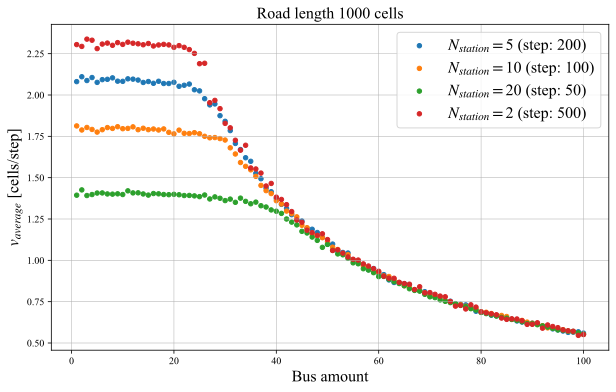

In [111]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

for tabel, n_star in zip(vel_buses, stat):
    step_station = n_cells/n_star
    label = "$N_{station}=$"+str(n_star)+f" (step: {int(step_station)})"
    #plt.scatter(bus_amount, np.array(tabel['station_time'])*step_station/1000, label=label, s=20)
    plt.scatter(bus_amount, tabel, label=label, s=20)

#label = "$N_{station}=$"+str(50)
#plt.scatter(np.arange(0, 100)[1::2], tabl['station_time']*(n_cells/50)/400, label=label, s=20)

#plt.ylim(0,0.05)
#plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Bus amount',  fontsize = fs)
plt.ylabel(r'$v_{average}$ [cells/step]',  fontsize = fs)
plt.title(f'Road length {n_cells} cells', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

In [57]:
#fig.savefig("data/bus_station_on_1000_cells_stop_10.jpg", dpi=300, format='jpg')

#### Research system bus-vehicle

Total number of people: 0-2000: 100, 300, 1000, 1600 

Research influence of passenger/drivers proportion to flow

##### Calculate

In [14]:
people = 1600
proportion = np.linspace(0,1, 101)

In [81]:
passenger = people*proportion
drivers = people - passenger.astype(int)
buses = np.ceil(passenger/bus_capasity).astype(int)

In [82]:
buses, drivers, n_cells

(array([ 0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  4,
         4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,  7,
         7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10,
        11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 14,
        14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17,
        17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20]),
 array([1600, 1584, 1568, 1552, 1536, 1520, 1504, 1488, 1472, 1456, 1440,
        1424, 1408, 1392, 1376, 1360, 1344, 1328, 1312, 1296, 1280, 1264,
        1248, 1232, 1216, 1200, 1184, 1168, 1152, 1137, 1120, 1104, 1088,
        1072, 1056, 1040, 1024, 1008,  992,  976,  960,  944,  928,  912,
         896,  880,  864,  848,  832,  816,  800,  784,  768,  752,  736,
         720,  704,  688,  673,  656,  640,  624,  608,  592,  576,  560,
         544,  528,  512,  496,  480,  464,  448,  432,  416,  400,  384,
         368,  352,  336,  3

In [39]:
station

(0, 70, 140, 210, 280, 350, 420, 490, 560, 630, 700, 770, 840, 910, 980)

In [40]:
def step(bus, veh):
    road_param = {
        "N_cells": n_cells,
        "N_lane": 2,
    }
    model.Bus.set_station(station)
    cars = {model.Bus: int(bus), model.HumanDriveVehicle: int(veh)}
    road = model.Model(road_parametrs=road_param, vehicles=cars)
    road.model_stabilization(2000)
    road.model_research(500)
    return road.result

In [41]:
%%time
result = Parallel(n_jobs=core, verbose=10)(delayed(step)(buses[i], drivers[i]) for i in range(len(proportion)))

[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:  8.8min
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed: 11.5min
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed: 13.8min
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 17.0min
[Parallel(n_jobs=6)]: Done  49 tasks      | elapsed: 19.6min
[Parallel(n_jobs=6)]: Done  60 tasks      | elapsed: 20.7min
[Parallel(n_jobs=6)]: Done  73 tasks      | elapsed: 23.2min
[Parallel(n_jobs=6)]: Done  86 tasks      | elapsed: 24.1min


CPU times: total: 172 ms
Wall time: 24min 25s


[Parallel(n_jobs=6)]: Done 101 out of 101 | elapsed: 24.4min remaining:    0.0s
[Parallel(n_jobs=6)]: Done 101 out of 101 | elapsed: 24.4min finished


In [42]:
tabel_city = pd.DataFrame(result).drop(labels=['velosity_av_typed'], axis=1)
tab_veh = [layer['velosity_av_typed'] for layer in result]
tabel_vehicle = pd.DataFrame(tab_veh)

In [43]:
tabel_city.to_csv(f'data/tabel_city_{people}.csv')
tabel_vehicle.to_csv(f"data/tabel_veh_{people}.csv")

##### Vizualozation

In [8]:
peop_arr = np.array([100, 300, 1000, 1600])
tabels_city = [pd.read_csv(f'data/tabel_city_{people}.csv', index_col=0) for people in peop_arr]
tabels_vehicle = [pd.read_csv(f"data/tabel_veh_{people}.csv", names=['bus', 'hdv'], header=None, skiprows=1) for people in peop_arr]

In [9]:
tabels_city[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   rho               101 non-null    object 
 1   flow              101 non-null    object 
 2   change_frequency  101 non-null    float64
 3   station_time      100 non-null    float64
dtypes: float64(2), object(2)
memory usage: 3.9+ KB


In [10]:
tabels_vehicle[0].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   bus     101 non-null    object
 1   hdv     101 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


__Vehicle type characteristics__

In [11]:
# in columns is average velosity for all vehicles 
# for get average velosity for vehicle should devision to amount of vehicle
tabels_vehicle[0].astype(str).head(4)

,bus,hdv
0,0.0,[2.48352]
1,[1.238],[2.45890909]
2,[1.278],[2.46485714]
3,[1.29],[2.47490722]


In [18]:
def delet_skob(s):
    return re.sub('\[|\]', '', s)

In [19]:
amount_hdv = ((peop_arr.reshape(4,1))@(proportion.reshape(1, 101))).astype(int)[:,::-1]
amount_bus = ((peop_arr.reshape(4,1))@(proportion.reshape(1, 101))).astype(int)
amount_bus = np.ceil(amount_bus/bus_capasity).astype(int)
rho_bus = amount_bus/n_cells/n_lane
rho_hdv = amount_hdv/n_cells/n_lane

In [20]:
velosity_bus = np.array([[val for val in tab['bus'].apply(delet_skob).astype(float).values] for tab in tabels_vehicle])
velosity_hdv = np.array([[val for val in tab['hdv'].apply(delet_skob).astype(float).values] for tab in tabels_vehicle])

__Lanes characteristics__

In [21]:
rho = np.array([[np.fromstring(val[1:-1:], sep=',') for val in tab['rho'].values] for tab in tabels_city])
flow = np.array([[np.fromstring(val[1:-1:], sep=',') for val in tab['flow'].values] for tab in tabels_city])
flow.mean(axis=2).shape

(4, 101)

In [22]:
velosity_all = flow.mean(axis=2)/rho.mean(axis=2)

In [ ]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 16

fig = plt.figure(figsize=(10,6), dpi=300)

for i in range(rho.shape[1]):
    label = f'lane {i}'
    plt.plot(proportion, flow[:,i], label=label)
    
label = "all lane"
plt.plot(proportion, flow.mean(axis=1), label=label)

plt.ylim(0,0.6)
#plt.xlim(0,1)
plt.legend(loc='upper right', fontsize=fs)
plt.xlabel(r'Proportion [passengers/drivers]',  fontsize = fs)
plt.ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
plt.title(r'1600 people on 2x1000 cells', fontsize=fs)
plt.grid(linewidth=0.5)
plt.show()

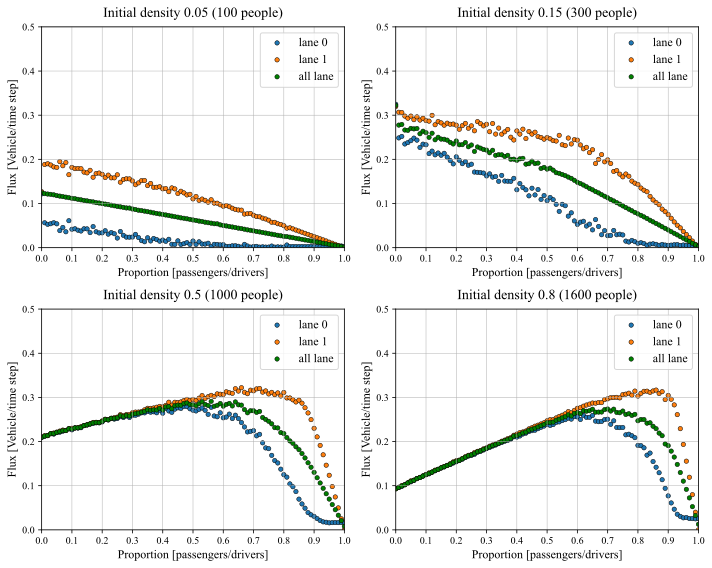

In [19]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 12

m, n = int(len(peop_arr)/2), 2

fig, ax = plt.subplots(figsize=(10,8), nrows=m, ncols=n, tight_layout=True, dpi=300);

for i in range(m):
    for j in range(n):
        #lane
        for k in range(rho.shape[2]):
            label = f'lane {k}'
            ax[i, j].scatter(proportion, flow[m*i+j,:,k], label=label, edgecolors='black', s=20, linewidths=0.5)
        label = "all lane"
        ax[i, j].scatter(proportion, flow.mean(axis=2)[m*i+j], label=label, color='green', edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].legend(loc='upper right', fontsize=fs)
        ax[i, j].set_xlim(0,1)
        ax[i, j].set_ylim(0,0.5)
        ax[i, j].set_title(f'Initial density {peop_arr[m*i+j]/n_cells/n_lane} ({peop_arr[m*i+j]} people)', fontsize=fs+2, pad=10)
        ax[i, j].set_xlabel(r'Proportion [passengers/drivers]',  fontsize = fs)
        ax[i, j].set_ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
        ax[i, j].set_xticks(np.arange(0, 1.1, step=0.1))
        ax[i, j].grid(linewidth=0.5)
        
plt.show()

In [21]:
#fig.savefig("data/bus_veр_2x2.jpg")

__Vehicle type characteristics__

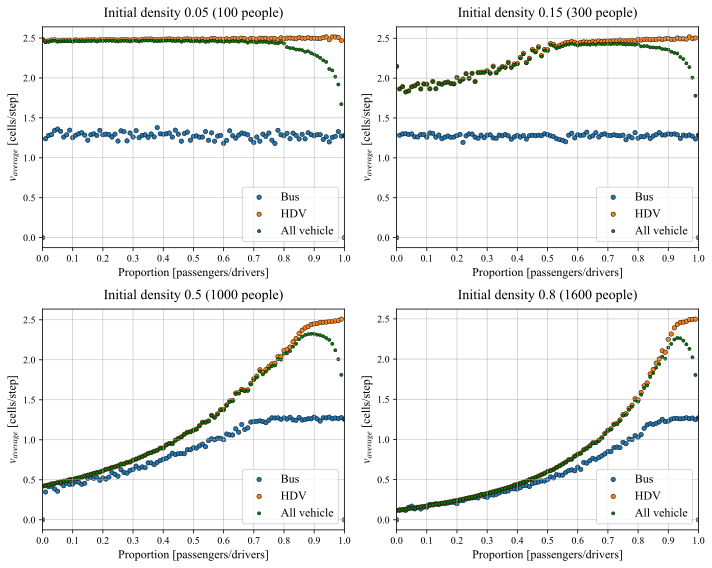

In [25]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 12

m, n = int(len(peop_arr)/2), 2

fig, ax = plt.subplots(figsize=(10,8), nrows=m, ncols=n, tight_layout=True, dpi=300);

for i in range(m):
    for j in range(n):

        ax[i, j].scatter(proportion, velosity_bus[m*i+j,:], label='Bus', edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].scatter(proportion, velosity_hdv[m*i+j,:], label='HDV', edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].scatter(proportion, velosity_all[m*i+j,:], label="All vehicle", color='green', edgecolors='black', s=10, linewidths=0.5)
        ax[i, j].set_xlim(0,1)
        #ax[i, j].set_ylim(0,2)
        ax[i, j].set_xlabel(r'Proportion [passengers/drivers]',  fontsize = fs)
        ax[i, j].set_ylabel(r'$v_{average}$ [cells/step]',  fontsize = fs)
        ax[i, j].set_xticks(np.arange(0, 1.1, step=0.1))
        
        ax[i, j].legend(loc='lower right', fontsize=fs)
        ax[i, j].set_title(f'Initial density {peop_arr[m*i+j]/n_cells/n_lane} ({peop_arr[m*i+j]} people)', fontsize=fs+2, pad=10)

        ax[i, j].grid(linewidth=0.5)
        
plt.show()

In [26]:
#fig.savefig("data/bus_veh_2x2_v.jpg")

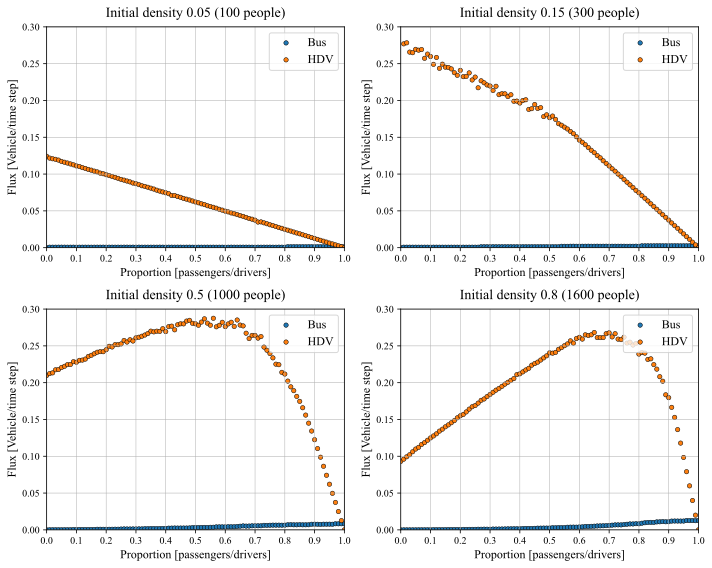

In [28]:
%matplotlib inline 
%config InlineBackend.figure_format = 'svg' 
rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]
fs = 12

m, n = int(len(peop_arr)/2), 2

fig, ax = plt.subplots(figsize=(10,8), nrows=m, ncols=n, tight_layout=True, dpi=300);

for i in range(m):
    for j in range(n):
        #lane
        ax[i, j].scatter(proportion, (velosity_bus*rho_bus)[m*i+j,:], label="Bus", edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].scatter(proportion, (velosity_hdv*rho_hdv)[m*i+j,:], label="HDV", edgecolors='black', s=20, linewidths=0.5)
        ax[i, j].legend(loc='upper right', fontsize=fs)
        ax[i, j].set_xlim(0,1)
        ax[i, j].set_ylim(0,0.3)
        ax[i, j].set_title(f'Initial density {peop_arr[m*i+j]/n_cells/n_lane} ({peop_arr[m*i+j]} people)', fontsize=fs+2, pad=10)
        ax[i, j].set_xlabel(r'Proportion [passengers/drivers]',  fontsize = fs)
        ax[i, j].set_ylabel(r'Flux [Vehicle/time step]',  fontsize = fs)
        ax[i, j].set_xticks(np.arange(0, 1.1, step=0.1))
        ax[i, j].grid(linewidth=0.5)
        
plt.show()

In [26]:
#fig.savefig("data/bus_veh_2x2_flux.jpg")

__Research city model__

$N$ - total number of people

$N_{1}$ - passengers without vehicle

$M = (N - N_1)$ - passengers with vehicle

In [ ]:
a = {"a": 2, "b":4, "c":5}

In [6]:
a: int = 6

In [8]:
b: float = 6.0

In [4]:
a = 0.5

In [9]:
b = [3, 5, 'h']

In [12]:
if not 6 in b:
    b.append(6)

In [13]:
b

[3, 5, 'h', 6]

In [12]:
a = np.arange(1000, step=50)

In [14]:
a[[2,4]]

array([100, 200])